# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')

In [9]:
# Test cell
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
mars_data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract each cell in the row
    cells = row.find_all('td')
    
    # Create a dictionary for each row
    row_data = {
        'id': cells[0].text.strip(),
        'terrestrial_date': cells[1].text.strip(),
        'sol': cells[2].text.strip(),
        'ls': cells[3].text.strip(),
        'month': cells[4].text.strip(),
        'min_temp': cells[5].text.strip(),
        'pressure': cells[6].text.strip()
    }

    # Add dictionary to list
    mars_data.append(row_data)

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_data)

In [13]:
# Confirm DataFrame was created successfully
df

id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis
df['id'] = pd.to_numeric(df['id'])
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [17]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1a. How many months are there on Mars? MONTH
# Number of unique Martian months
martian_months = df['month'].nunique()
print(martian_months)


12


In [20]:
#1b. Number of data points/Martian month
rows_per_martian_month = df['month'].value_counts().sort_index()
print(rows_per_martian_month)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [21]:
# 2. How many Martian days' worth of data are there? SOLS
martian_days = df['sol'].nunique()
martian_days

1867

In [22]:
# 3. What is the average low temperature by month?
avg_min_temp_per_martian_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_per_martian_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [23]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average minimum temperature per Martian month
avg_min_temp_per_martian_month = df.groupby('month')['min_temp'].mean()

# Identify the coldest month (month with the lowest average minimum temperature)
coldest_month = avg_min_temp_per_martian_month.idxmin()
print(f"The coldest month is: {coldest_month}")

# Identify the hottest month (month with the highest average minimum temperature)
warmest_month = avg_min_temp_per_martian_month.idxmax()
print(f"The hottest month is: {warmest_month}")


The coldest month is: 3
The hottest month is: 8


<Axes: title={'center': 'Average Minimum Temperature per Month on Mars'}, xlabel='month', ylabel='Average Minimum Temperature (°C)'>

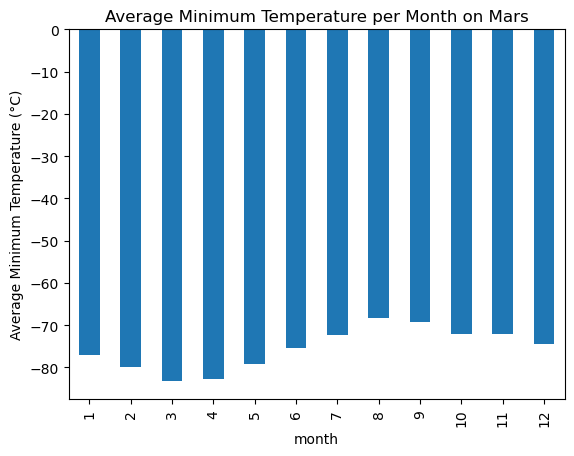

In [24]:
# Find the coldest and warmest months
coldest_month = avg_min_temp_per_martian_month.idxmin()
warmest_month = avg_min_temp_per_martian_month.idxmax()

# Plot the results as a bar chart
avg_min_temp_per_martian_month.plot(kind='bar', title='Average Minimum Temperature per Month on Mars', ylabel='Average Minimum Temperature (°C)')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



In [26]:
# 4. Average pressure by Martian month
avg_pressure_per_martian_month = df.groupby('month')['pressure'].mean()
avg_pressure_per_martian_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Atmospheric Pressure per Month on Mars'}, xlabel='month', ylabel='Average Atmospheric Pressure (Pa)'>

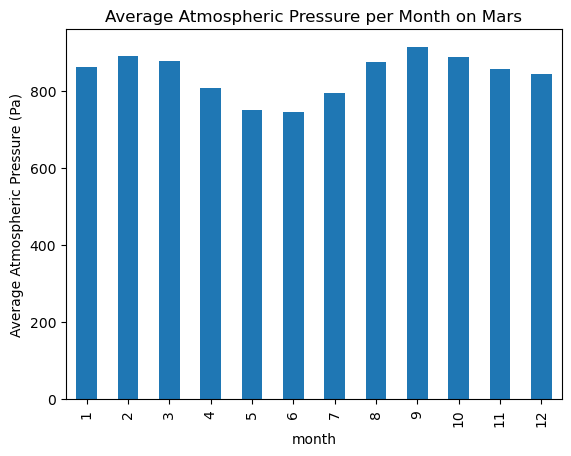

In [27]:
# Bar chart for monthly atmospheric pressure
avg_pressure_per_martian_month.plot(kind='bar', title='Average Atmospheric Pressure per Month on Mars', xlabel='month', ylabel='Average Atmospheric Pressure (Pa)')

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The number of terrestrial (Earth) days in a Martian year is approximately 730 days


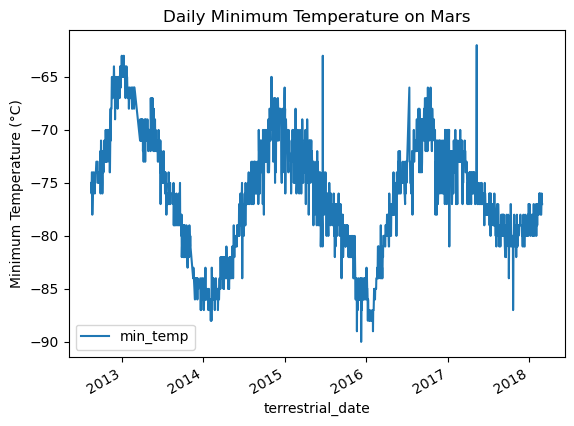

In [29]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature on Mars', ylabel='Minimum Temperature (°C)')

# Convert terrestrial_date to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Identify the start and end dates of one complete Martian year cycle
start_date = pd.to_datetime('2012-08-16')
end_date = pd.to_datetime('2014-08-16')

# Calculate the number of days between the start and end dates
martian_year_length = (end_date - start_date).days
print(f"The number of terrestrial (Earth) days in a Martian year is approximately {martian_year_length} days")

### The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Calculations show that a year on Mars is approximately 730 days but the internet search indicated that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data has been written to 'mars_weather_data.csv'")

Data has been written to 'mars_weather_data.csv'


In [33]:
browser.quit()